In [2]:
from cartopy import crs as ccrs

In [17]:
import sys
sys.path.append('./lib')

from quickmap import *

# Base Map

In [18]:
map_description = MapDescription.base_map()

In [22]:
print(map_description)

In [20]:
map_description.canvas.x_left = -180
map_description.canvas.x_right = 180
map_description.canvas.y_top = 80
map_description.canvas.y_bottom = -80
map_description.canvas.display_projection_crs = "mercator"

In [21]:
map_description.title.text_content = "World map"
map_description.subtitle.text_content = "Coastlines and borders"
map_description.remark.text_content = "Data from Natural Earth.\nPlotted with NCMapper."

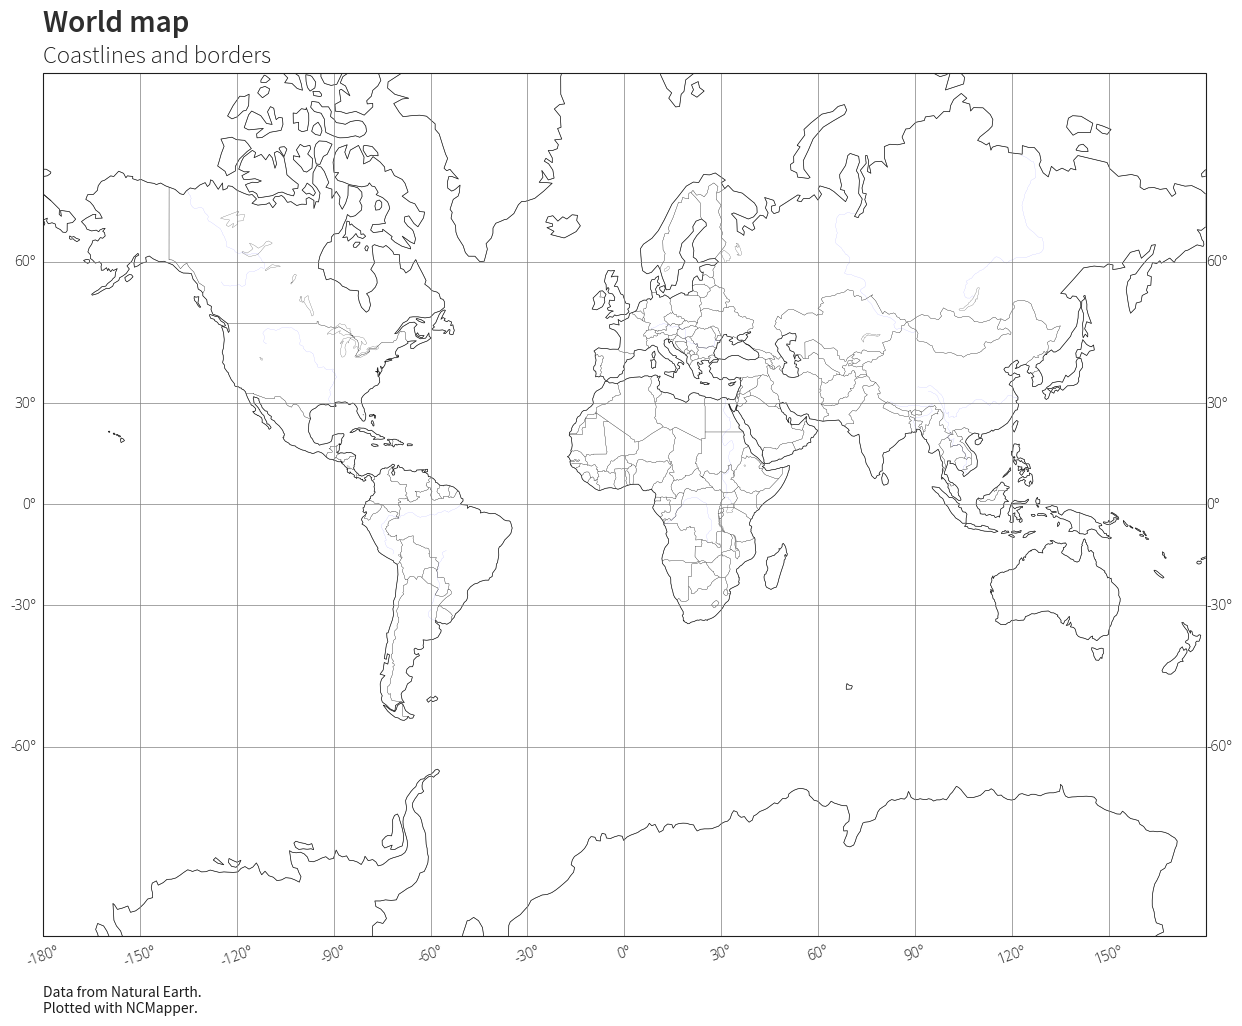

In [23]:
renderer = Renderer(map_description)
renderer.render()

 # A Shading Layer

In [24]:
map_description = MapDescription.a_shading_from_a_geotiff(
    "./data/temperature_2m_2020010100.tif",
)

In [25]:
layer = map_description.layer_list.select_layers_by_class(ShadingLayer)[0]
layer.data -= 273.15
layer.set_default_color_map()
layer.colorbar_ticks = [-30, -15, 0, 15, 30]

In [26]:
map_description.canvas.x_left = -180
map_description.canvas.x_right = 180
map_description.canvas.y_min = -80
map_description.canvas.y_max = 80
map_description.canvas.display_projection_crs = "mercator"

In [27]:
map_description.title.text_content = "ERA5: Temperature"
map_description.subtitle.text_content = "2020-01-01 00:00 UTC | 2m"
map_description.remark.text_content = "Data from ECMWF.\nPlotted with NCMapper."

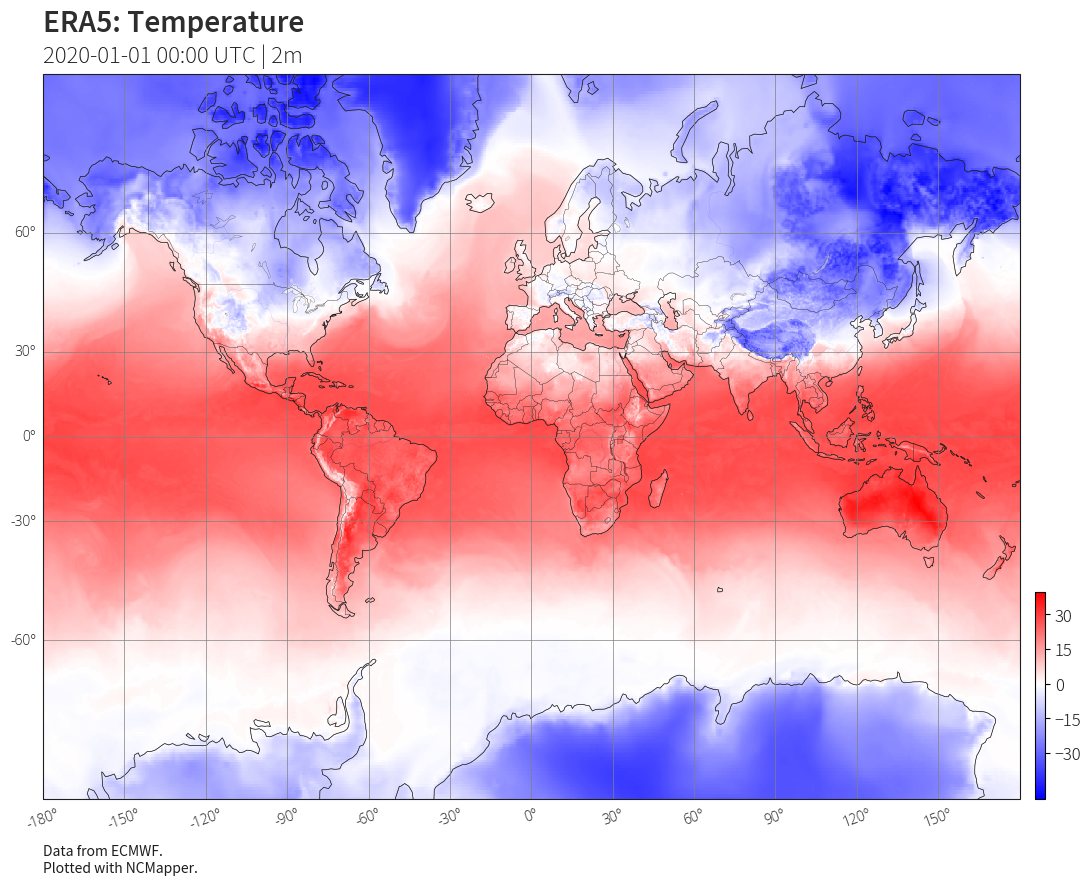

In [28]:
renderer = Renderer(map_description)
renderer.render()

# A Contour Layer

In [29]:
map_description = MapDescription.a_contour_from_a_geotiff(
    "./data/geopotential_300_2020010100.tif",
)

In [30]:
map_description.canvas.x_left = -180
map_description.canvas.x_right = 180
map_description.canvas.y_min = -80
map_description.canvas.y_max = 80
map_description.canvas.display_projection_crs = ccrs.Orthographic(central_longitude=121, central_latitude=25)

In [31]:
layer = map_description.layer_list.select_layers_by_class(CoastlineLayer)[0]
layer.line_width = 0.2

layer = map_description.layer_list.select_layers_by_class(CountriesBorderLayer)[0]
layer.face_color = "#FCFCFC"
layer.line_width = 0.1

layer = map_description.layer_list.select_layers_by_class(ContourLayer)[0]
layer.value_interval = 1000

In [32]:
map_description.title.text_content = "ERA5: Geopotential"
map_description.subtitle.text_content = "2020-01-01 00:00 UTC | 300 hPa"
map_description.remark.text_content = "Data from ECMWF.\nPlotted with NCMapper."

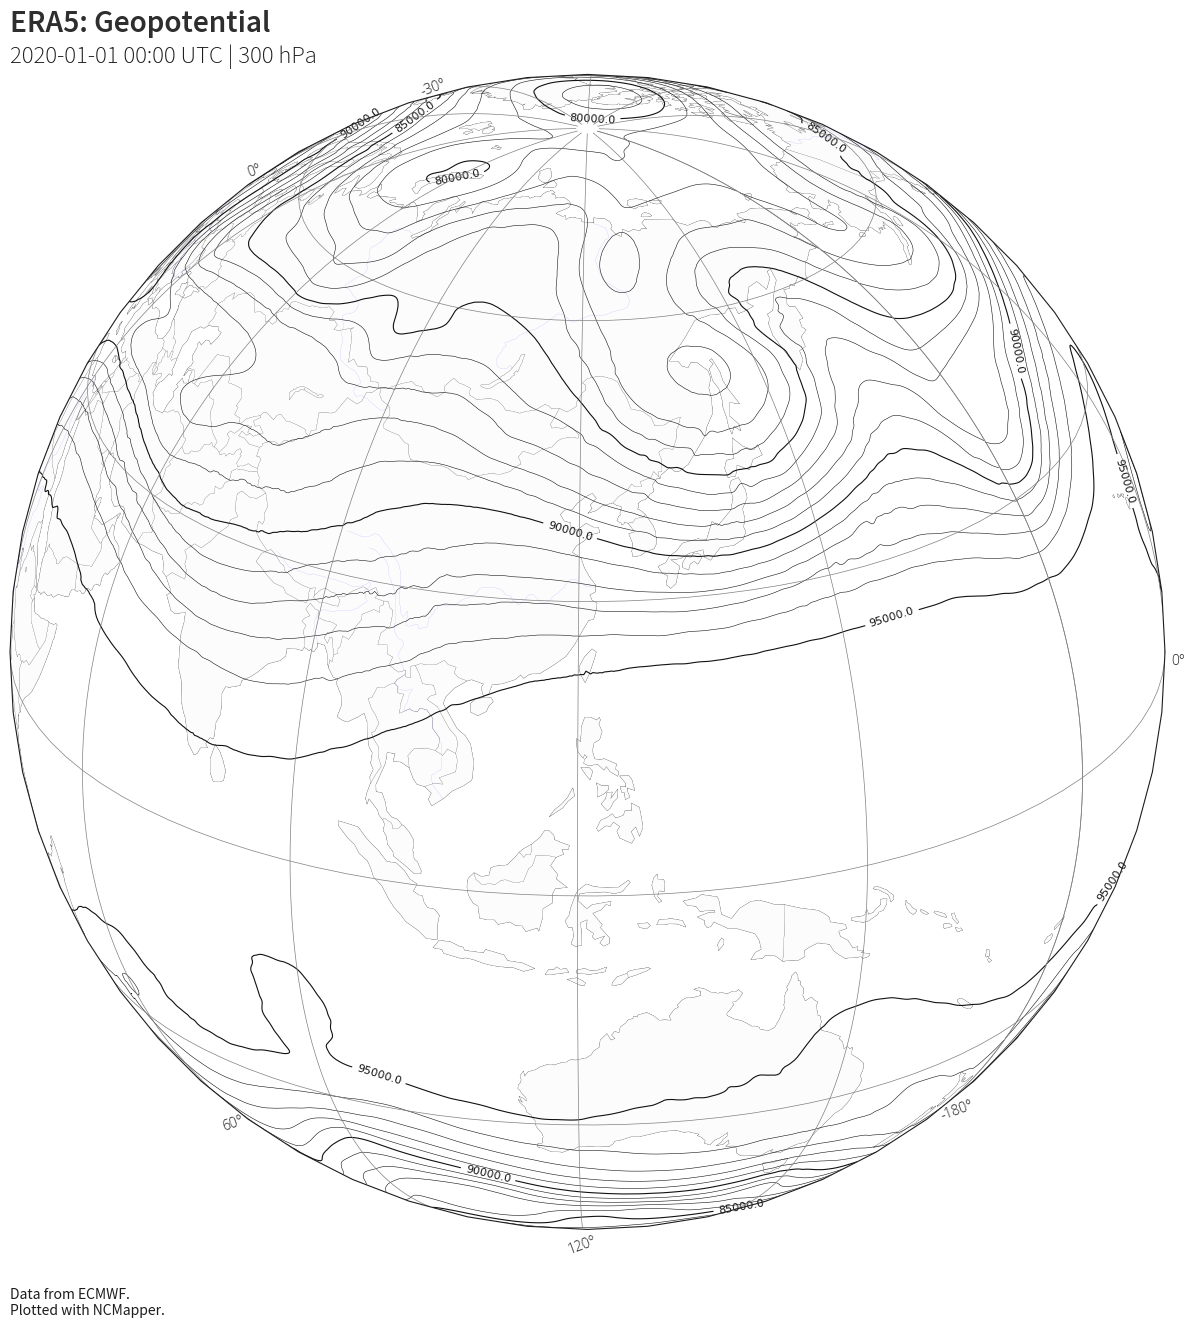

In [33]:
renderer = Renderer(map_description)
renderer.render("output_geopotential.jpg")

# Contour And Shading Layers

In [34]:
map_description = MapDescription.contour_and_shading_from_two_geotiff(
    "./data/geopotential_300_2020010100.tif",
    "./data/temperature_2m_2020010100.tif",
)

In [35]:
layer = map_description.layer_list.select_layers_by_class(ShadingLayer)[0]
layer.data -= 273.15
layer.set_default_color_map()
layer.colorbar_ticks = [-30, -15, 0, 15, 30]
layer.value_color_dict = {-50 : (0.4, 0.4, 1.0, 1.0),
                          0   : (1.0, 1.0, 1.0, 1.0),
                          40  : (1.0, 0.4, 0.4, 1.0)}

In [36]:
layer = map_description.layer_list.select_layers_by_class(ContourLayer)[0]
layer.line_color = (0.2, 0.2, 0.2, 1.0)

In [37]:
map_description.canvas.x_left = -180
map_description.canvas.x_right = 180
map_description.canvas.y_min = -80
map_description.canvas.y_max = 80
map_description.canvas.display_projection_crs = ccrs.Orthographic(central_longitude=121, central_latitude=25)

In [38]:
map_description.title.text_content = "ERA5: Geopotential and Temperature"
map_description.subtitle.text_content = "2020-01-01 00:00 UTC | Contour: 300hPa Geopotential | Shading: 2m Temperature\n"
map_description.remark.text_content = "Data from ECMWF.\nPlotted with NCMapper."

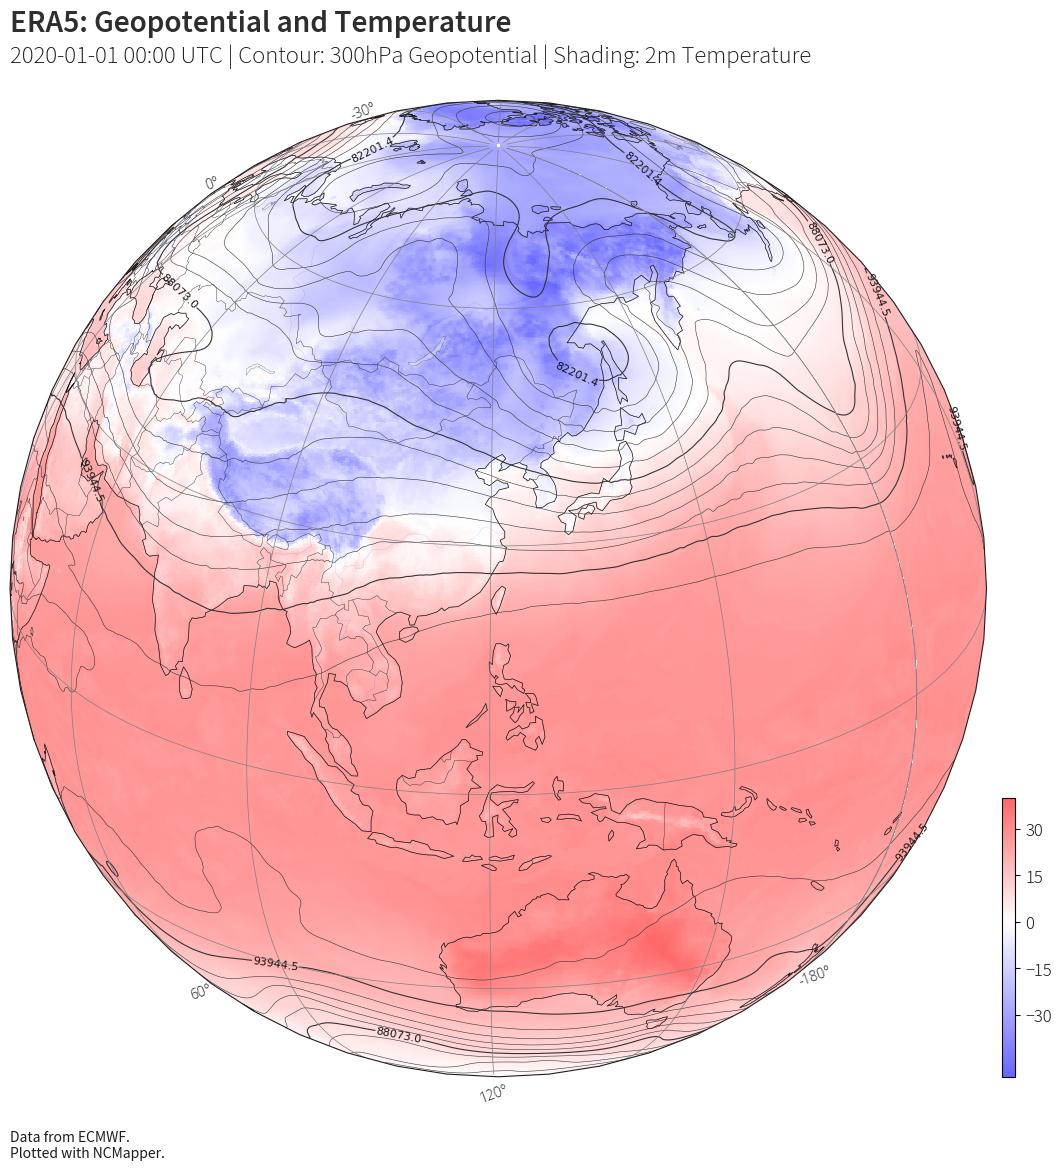

In [39]:
renderer = Renderer(map_description)
renderer.render("output_geopotential.jpg")

In [43]:
json_with_raw_data = map_description.export_to_json_for_ncmapper(
    json_path="WithoutArray_WithGeojson.json",
    include_original_array=False,
    include_contour_geojson=True,
)
print("str length")
print(len(json_with_raw_data))
print("\njson:")
print(json_with_raw_data)

str length
2174048

json:
{
    "title": {
        "text_content": "ERA5: Geopotential and Temperature",
        "font_size": 20,
        "font_weight": 600,
        "font_color": [
            0.1803921568627451,
            0.1803921568627451,
            0.1803921568627451,
            1.0
        ],
        "font": "Noto-TC"
    },
    "subtitle": {
        "text_content": "ERA5: Geopotential and Temperature",
        "font_size": 20,
        "font_weight": 600,
        "font_color": [
            0.1803921568627451,
            0.1803921568627451,
            0.1803921568627451,
            1.0
        ],
        "font": "Noto-TC"
    },
    "remark": {
        "text_content": "ERA5: Geopotential and Temperature",
        "font_size": 20,
        "font_weight": 600,
        "font_color": [
            0.1803921568627451,
            0.1803921568627451,
            0.1803921568627451,
            1.0
        ],
        "font": "Noto-TC"
    },
    "canvas": {
        "x_left": -180

In [42]:
json_with_raw_data = map_description.export_to_json_for_ncmapper(
    json_path="WithoutArray_WithoutJson.json",
    include_original_array=False,
    include_contour_geojson=False,
)
print("str length")
print(len(json_with_raw_data))
print("\njson:")
print(json_with_raw_data)

str length
6982

json:
{
    "title": {
        "text_content": "ERA5: Geopotential and Temperature",
        "font_size": 20,
        "font_weight": 600,
        "font_color": [
            0.1803921568627451,
            0.1803921568627451,
            0.1803921568627451,
            1.0
        ],
        "font": "Noto-TC"
    },
    "subtitle": {
        "text_content": "ERA5: Geopotential and Temperature",
        "font_size": 20,
        "font_weight": 600,
        "font_color": [
            0.1803921568627451,
            0.1803921568627451,
            0.1803921568627451,
            1.0
        ],
        "font": "Noto-TC"
    },
    "remark": {
        "text_content": "ERA5: Geopotential and Temperature",
        "font_size": 20,
        "font_weight": 600,
        "font_color": [
            0.1803921568627451,
            0.1803921568627451,
            0.1803921568627451,
            1.0
        ],
        "font": "Noto-TC"
    },
    "canvas": {
        "x_left": -180.0,